#Pattern Recognition Approaches for Identifying Credit Card Fraudulent Transaction using Machine Learning.




Installing necessary libraries for interactive visualisation


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing necessary libraries

In [ ]:
# import holoviews as hv
# import hvplot.pandas

import numpy as np # For linear algebra
import pandas as pd # Creating DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

# Feature Scaling
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Split Data
from sklearn.model_selection import train_test_split

# SMOTE
from imblearn.over_sampling import SMOTE

# Tensorflow
import tensorflow as tf

# Scoring
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

Uploading the Dataset from Kaggle using pandas.

In [ ]:
Credit_Card_Data = pd.read_csv('/content/drive/MyDrive/creditcard.csv')


In [ ]:
Credit_Card_Data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Checking the dataset.

In [ ]:
Credit_Card_Data.describe

<bound method NDFrame.describe of             Time         V1         V2  ...       V28  Amount  Class
0            0.0  -1.359807  -0.072781  ... -0.021053  149.62      0
1            0.0   1.191857   0.266151  ...  0.014724    2.69      0
2            1.0  -1.358354  -1.340163  ... -0.059752  378.66      0
3            1.0  -0.966272  -0.185226  ...  0.061458  123.50      0
4            2.0  -1.158233   0.877737  ...  0.215153   69.99      0
...          ...        ...        ...  ...       ...     ...    ...
284802  172786.0 -11.881118  10.071785  ...  0.823731    0.77      0
284803  172787.0  -0.732789  -0.055080  ... -0.053527   24.79      0
284804  172788.0   1.919565  -0.301254  ... -0.026561   67.88      0
284805  172788.0  -0.240440   0.530483  ...  0.104533   10.00      0
284806  172792.0  -0.533413  -0.189733  ...  0.013649  217.00      0

[284807 rows x 31 columns]>

In [ ]:
Credit_Card_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Viewing The Dataset

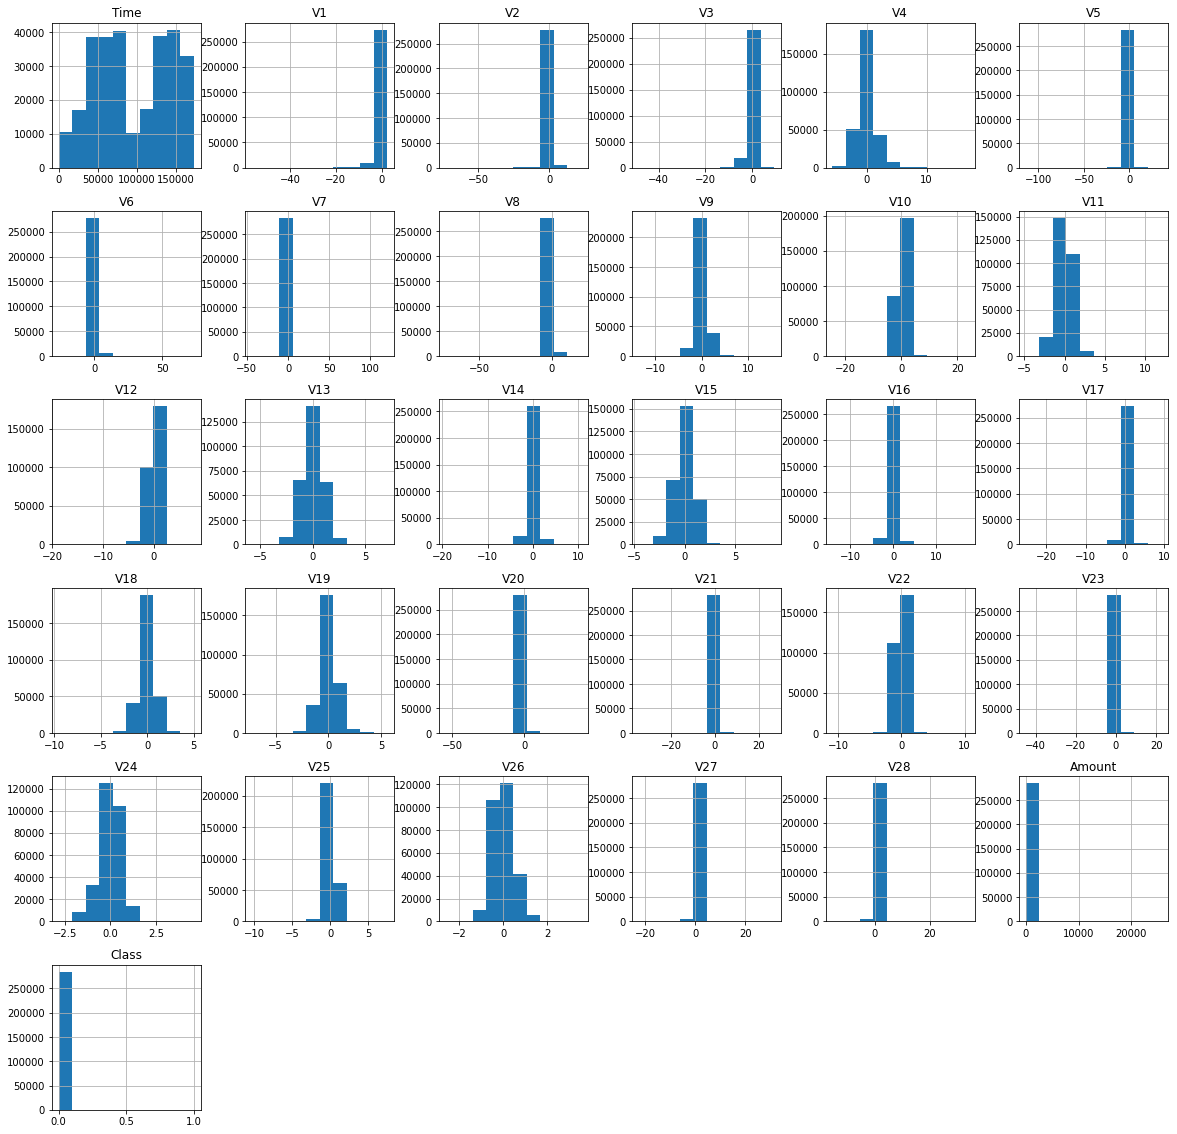

In [ ]:
# plot the histogram of each parameter
Credit_Card_Data.hist(figsize = (20, 20))
plt.show()

Determining the correlation between the different attributes

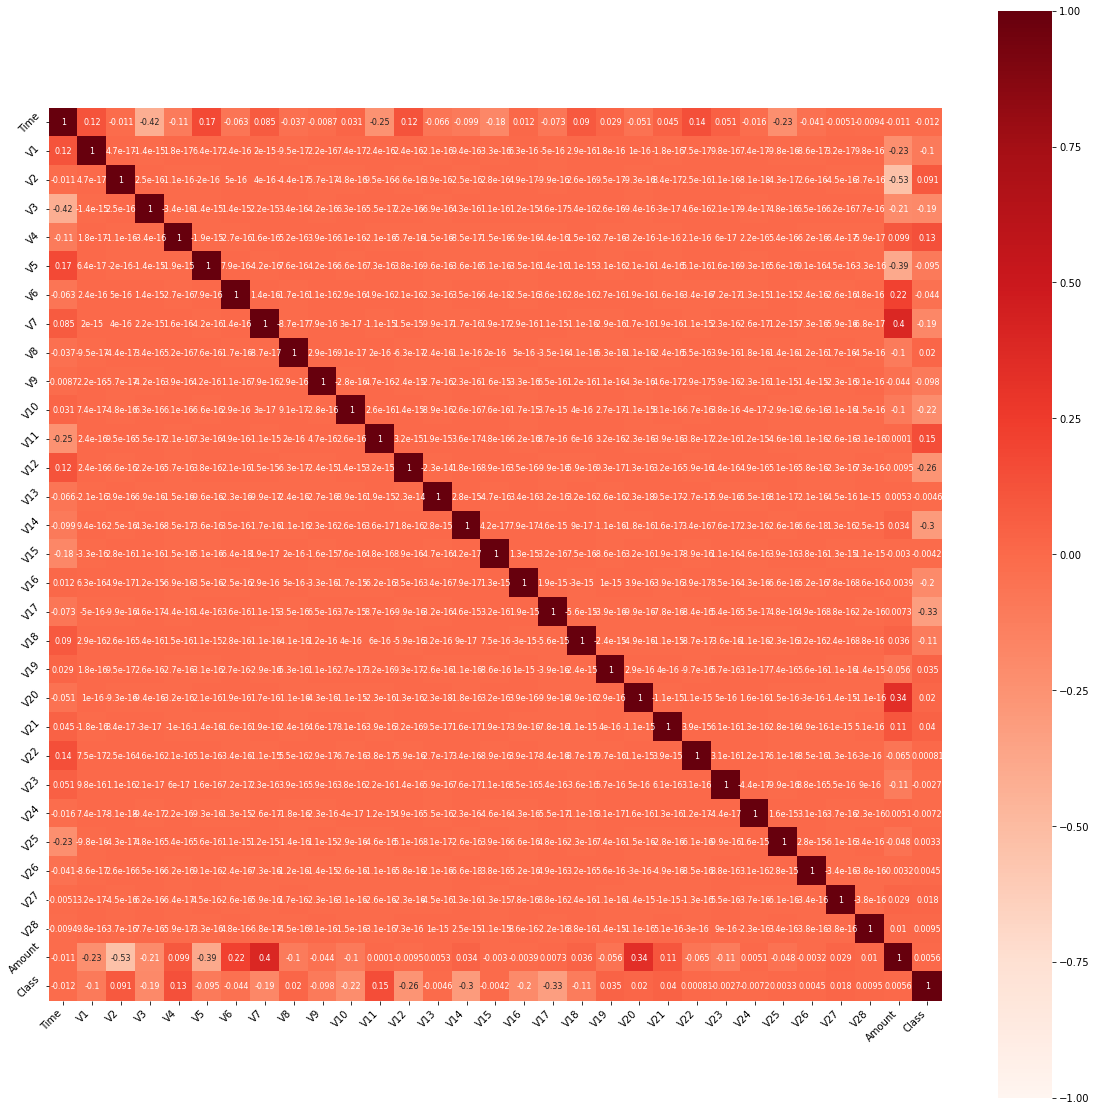

In [ ]:
plt.figure(figsize=(20, 20))
corr = Credit_Card_Data.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap="Reds", square=True, annot=True,
                 annot_kws={"size": 8})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=45, horizontalalignment='right')

plt.show()


As seen from the above figure the dataset are not correlated to each other

Data Pre-processing


*   Checking the missing values in the dataset



In [ ]:
# Checking missing values
# Checking the columns with missing values
Missing_Values = Credit_Card_Data.isna().any()
Missing_Values

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [ ]:
# Viewing the Legit & Fraudulent transactions 
Credit_Card_Data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

**It can be seen that the dataset is highly imbalanced.**

0 means Normal Transaction

1 means fraudulent transaction

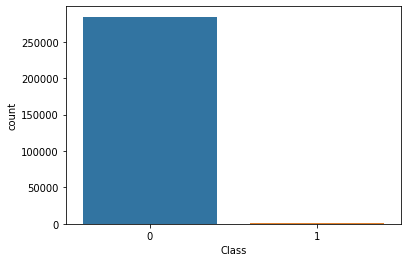

In [ ]:
sns.countplot(x='Class',data=Credit_Card_Data)





*   Checking for duplicate values







In [ ]:
# Check Duplicate data
Duplicate_Rows = Credit_Card_Data[Credit_Card_Data.duplicated()]

In [ ]:
Duplicate_Rows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,-0.484688,0.872490,0.851636,-0.571745,0.100974,-1.519772,-0.284376,-0.310524,-0.404248,-0.823374,-0.290348,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,-0.482474,0.871800,0.853447,-0.571822,0.102252,-1.519991,-0.285912,-0.309633,-0.403902,-0.823743,-0.283264,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,0.005356,-0.541998,0.745036,-0.375165,-0.068227,-0.795939,-0.497901,-0.134224,-1.004958,0.086074,-0.207620,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,-0.828015,-1.192581,0.944989,1.372532,-0.036493,-0.208747,0.320086,-0.204910,-0.024821,-0.468859,0.031950,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,-0.830603,-1.191774,0.942870,1.372621,-0.037988,-0.208490,0.321883,-0.205951,-0.025225,-0.468427,0.023667,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,-1.449823,-0.508930,0.600035,-0.627313,1.017499,-0.887384,0.420096,1.856497,1.315099,1.096112,-0.821707,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


**Taking actions to pre-process the dataset**
1. Dropping the duplicate values

In [ ]:
print('The dataset before dropping duplicate value:' + str(Credit_Card_Data.shape))

Credit_Card_Data = Credit_Card_Data.drop_duplicates()

print('\nThe dataset after dropping duplicate value: ' + str(Credit_Card_Data.shape))

The dataset before dropping duplicate value:(284807, 31)

The dataset after dropping duplicate value: (283726, 31)


2. Feature-Scaling

‘Time’ and ‘Amount’ features need to be scaled before we proceed to build machine learning models

In [ ]:
CT = ColumnTransformer([('std_feat', StandardScaler(), ['Time', 'Amount'])], remainder='passthrough')
Credit_Card_Data[['Time', 'Amount']] = CT.fit_transform(Credit_Card_Data[['Time', 'Amount']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [ ]:
# Checking the new Dataframe
Credit_Card_Data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996823,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,-1.996823,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,-1.996802,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,-1.996802,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,-1.996781,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0


Splitting the Dataset in order to get training and testing data

In [ ]:
X = Credit_Card_Data.drop(['Class'], axis=1)
y = Credit_Card_Data['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state=42)

To address imbalanced dataset, Oversampling method known as SMOTE has been used.

In [ ]:
OverSampling_SM = SMOTE(sampling_strategy='minority',random_state = 1,k_neighbors=5)
Train_Smote_X,Train_Smote_Y = OverSampling_SM.fit_resample(X_train,y_train)
X_train = pd.DataFrame(data = Train_Smote_X, columns = X_train.columns)
y_train = pd.DataFrame(data = Train_Smote_Y)

Checking whether the imbalaced dataset has been improved or not

In [ ]:
#Y contains the class value (0 = Normal Transaction,1 = fraudulent transaction)
y_train.value_counts()


Class
1        226597
0        226597
dtype: int64

Buidling Machine Learning Models

# 1. Logistic Regression (Baseline Model)

In [ ]:
# Importing LogisticRegression from Sklearn 

from sklearn.linear_model import LogisticRegression

Model_LR = LogisticRegression()

# Training the Logistic Regression Model with Training Data
Model_LR.fit(X_train, y_train)
yPredLR = Model_LR.predict(X_test) 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
import sklearn.linear_model, sklearn.datasets

# accuracy on training data
X_train_prediction = Model_LR.predict(X_train)
X_test_prediction = Model_LR.predict(X_test)
# The accuracy score: 1 for perfect prediction
print('Training Accuracy: {:.4f}'.format(sklearn.metrics.accuracy_score(X_train_prediction, y_train)))
print('Testing Accuracy: {:.4f}'.format(sklearn.metrics.accuracy_score(X_test_prediction, y_test)))

# Confusion matrix
print('Confusion matrix: ', sklearn.metrics.confusion_matrix(y_test, X_test_prediction, normalize='all'))

Training Accuracy: 0.9487
Testing Accuracy: 0.9759
Confusion matrix:  [[9.74465161e-01 2.39488246e-02]
 [1.76223875e-04 1.40979100e-03]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


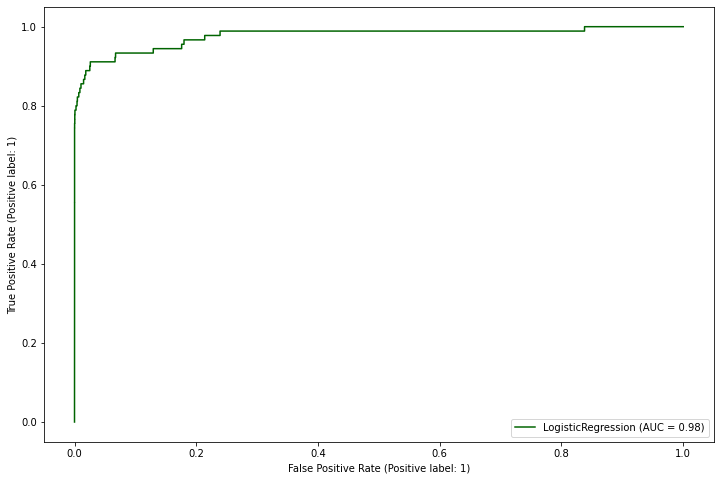

In [ ]:
# Plotting ROC currve
from sklearn.metrics import plot_roc_curve

fig, ax = plt.subplots(figsize=(12, 8))
plot_roc_curve(Model_LR, X_test, y_test, color='darkgreen', ax=ax)

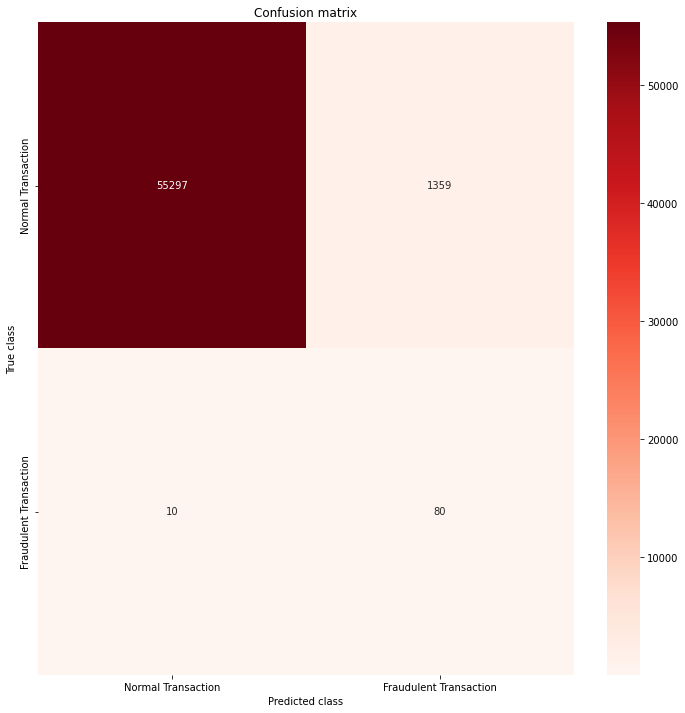

In [ ]:
#Visulalizing the confusion matrix
LABELS = ['Normal Transaction', 'Fraudulent Transaction'] 
conf_matrix_lg = confusion_matrix(y_test, X_test_prediction) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix_lg, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d",cmap = 'Reds')
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

Evaluating the performance of the Logistic Regression Model.Here, Accuracy,Precision, Recall and F1 score have been implemented. However, F1-score is the desired choice for evaluating the performance of the model. In the report, Accuracy and F1-score have been compared.

In [ ]:
AccuLR = accuracy_score(y_test, yPredLR) 
print("The accuracy is {}".format(AccuLR)) 
  
PrecLR = precision_score(y_test, yPredLR) 
print("The precision is {}".format(PrecLR)) 
  
RecLR = recall_score(y_test, yPredLR) 
print("The recall is {}".format(RecLR)) 
  
f1LR = f1_score(y_test, yPredLR) 
print("The F1-Score is {}".format(f1LR)) 

The accuracy is 0.9758749515384344
The precision is 0.05559416261292564
The recall is 0.8888888888888888
The F1-Score is 0.10464355788096795


# 2. Random Forest Classifier

In [ ]:
#Building the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier 
#random forest model creation 
Model_RFC = RandomForestClassifier() 
Model_RFC.fit(X_train, y_train) 
#predictions 
yPredRF = Model_RFC.predict(X_test) 

# Takes 5m to run

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Evaluating the performance of the RF Model.Here, Accuracy,Precision, Recall and F1 score have been implemented. However, F1-score is the desired choice for evaluating the performance of the model. In the report, Accuracy and F1-score have been compared.

In [ ]:
AccuRF = accuracy_score(y_test, yPredRF) 
print("The accuracy is {}".format(AccuRF)) 
  
PrecRF = precision_score(y_test, yPredRF) 
print("The precision is {}".format(PrecRF)) 
  
RecRF = recall_score(y_test, yPredRF) 
print("The recall is {}".format(RecRF)) 
  
f1RF = f1_score(y_test, yPredRF) 
print("The F1-Score is {}".format(f1RF)) 
  

The accuracy is 0.9995418179254926
The precision is 0.9210526315789473
The recall is 0.7777777777777778
The F1-Score is 0.8433734939759038


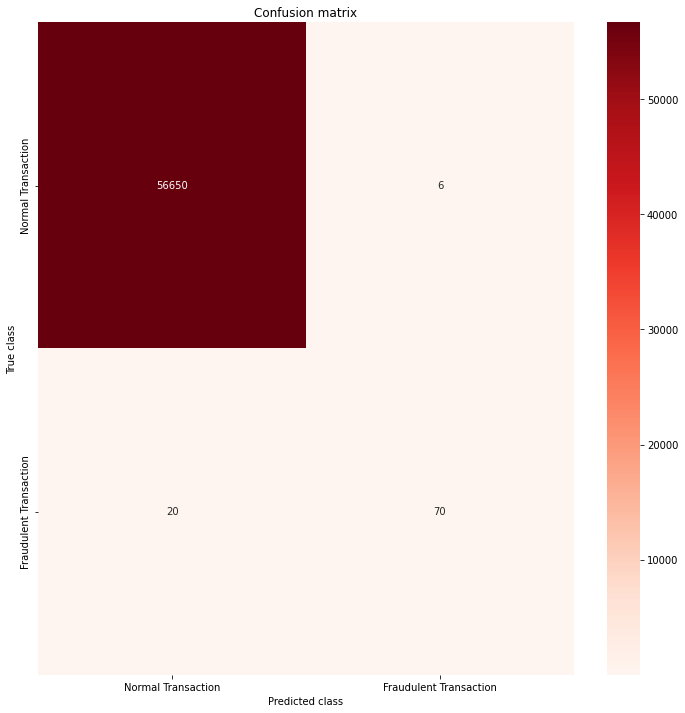

In [ ]:
#Visulalizing the confusion matrix
LABELS = ['Normal Transaction', 'Fraudulent Transaction'] 
conf_matrix_rf = confusion_matrix(y_test, yPredRF) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix_rf, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d",cmap = 'Reds')
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

# 3. XGBoost Classifier

In [ ]:
import xgboost as xgb

Model_XGB = xgb.XGBClassifier(n_estimators = 500, max_depth = 30, learning_rate = 0.2)
Model_XGB.fit(X_train, y_train)
y_predXgb = Model_XGB.predict(X_test)

#Took 18 minutes to complete

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 15.0, 'Predicted Label')

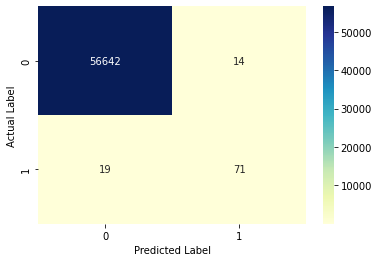

In [ ]:
cnf_matrix_xgb = confusion_matrix(y_test, y_predXgb)
sns.heatmap(pd.DataFrame(cnf_matrix_xgb), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')



Evaluating the performance of the XGBoost Model.Here, Accuracy,Precision, Recall and F1 score have been implemented. However, F1-score is the desired choice for evaluating the performance of the model. In the report, Accuracy and F1-score have been compared.

In [ ]:
AccuXGB = accuracy_score(y_test, y_predXgb) 
print("The accuracy is {}".format(AccuXGB)) 
  
PrecXGB = precision_score(y_test, y_predXgb) 
print("The precision is {}".format(PrecXGB)) 
  
RecXGB = recall_score(y_test, y_predXgb) 
print("The recall is {}".format(RecXGB)) 
  
f1XGB = f1_score(y_test, y_predXgb) 
print("The F1-Score is {}".format(f1XGB)) 
  

The accuracy is 0.9994184612131252
The precision is 0.8352941176470589
The recall is 0.7888888888888889
The F1-Score is 0.8114285714285714


# 4. Decision Tree Classifier

In [ ]:
# Train a Decision Tree Classifier since it has the best accuracy on the dataset.
from sklearn.tree import DecisionTreeClassifier
Model_DT = DecisionTreeClassifier()
Model_DT.fit(X_train, y_train)
y_predDT = Model_DT.predict(X_test)

Text(0.5, 15.0, 'Predicted Label')

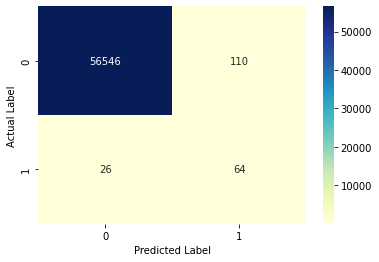

In [ ]:
cnf_matrix_svc = confusion_matrix(y_test, y_predDT)
sns.heatmap(pd.DataFrame(cnf_matrix_svc), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

Evaluating the performance of the Decision Tree Classifier Model.Here, Accuracy,Precision, Recall and F1 score have been implemented. However, F1-score is the desired choice for evaluating the performance of the model. In the report, Accuracy and F1-score have been compared.

In [ ]:
AccuDT = accuracy_score(y_test, y_predDT) 
print("The accuracy is {}".format(AccuDT)) 
  
PrecDT = precision_score(y_test, y_predDT) 
print("The precision is {}".format(PrecDT)) 
  
RecDT = recall_score(y_test, y_predDT) 
print("The recall is {}".format(RecDT)) 
  
f1DT = f1_score(y_test, y_predDT) 
print("The F1-Score is {}".format(f1DT)) 
  

The accuracy is 0.9976033553025764
The precision is 0.367816091954023
The recall is 0.7111111111111111
The F1-Score is 0.48484848484848486


End of Machine Learning Models
